In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics

In [3]:
data=pd.read_csv("mlfolder/CSV_Files/DiabetesData_PimaIndians.csv")

In [4]:
data

,Glucose,DiastolicPressue,BMI,Age,Diabetes
0,148,72,33.6,50,pos
1,85,66,26.6,31,neg
2,183,64,23.3,32,pos
3,89,66,28.1,21,neg
4,137,40,43.1,33,pos
...,...,...,...,...,...
719,101,76,32.9,63,neg
720,122,70,36.8,27,neg
721,121,72,26.2,30,neg
722,126,60,30.1,47,pos


# only Glucose Values

In [5]:
X=np.array(data['Glucose']).reshape(-1,1)
y=data["Diabetes"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [6]:
y_train.shape

(651,)

In [7]:
logReg=linear_model.LogisticRegression(solver='liblinear')

In [8]:
logReg.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [9]:
 logReg.coef_

array([[0.03271667]])

In [10]:
logReg.intercept_

array([-4.67381999])

In [11]:
predictions=logReg.predict(X_test)

In [12]:
np.sum(predictions==y_test)/len(y_test)

np.float64(0.7808219178082192)

In [13]:
#using metrics
metrics.accuracy_score(y_test,predictions)

0.7808219178082192

In [14]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       0.81      0.90      0.85        51
         pos       0.69      0.50      0.58        22

    accuracy                           0.78        73
   macro avg       0.75      0.70      0.72        73
weighted avg       0.77      0.78      0.77        73



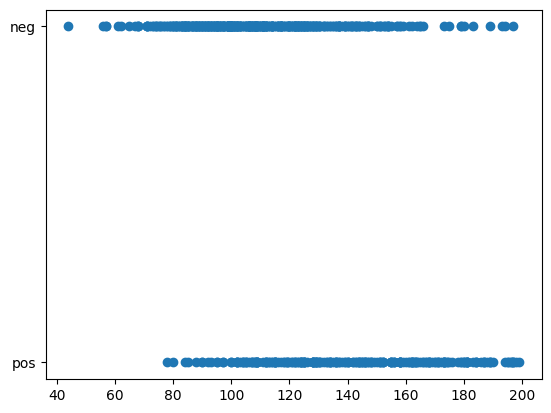

In [17]:
fig,ax=plt.subplots()
ax.scatter(X_train,y_train)

**Decision Boundary using Glucose values**

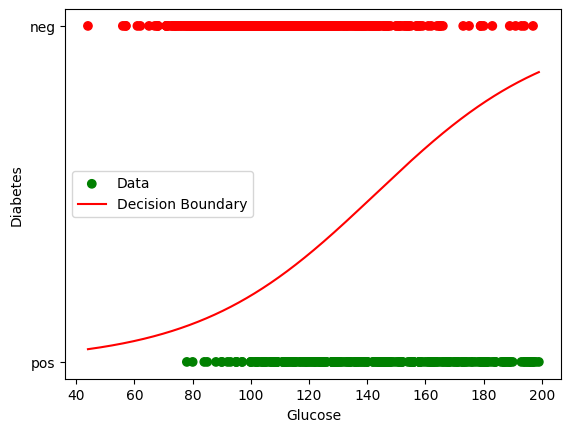

In [24]:
y_numeric=np.where(y=='neg',0,1)
xgrid=np.linspace(X.min(),X.max(),4000).reshape(-1,1)
y_prob=logReg.predict_proba(xgrid)[:,1]
fig,ax=plt.subplots()
ax.scatter(X,y,c=y_numeric,cmap=matplotlib.colors.ListedColormap(['red','green']),label="Data")
ax.plot(xgrid,y_prob,label='Decision Boundary',color='red')
ax.set_xlabel('Glucose')
ax.set_ylabel('Diabetes')
ax.legend()
plt.show()

**BMI values**

In [25]:
X=np.array(data['BMI']).reshape(-1,1)
y=data['Diabetes']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [26]:
logReg=linear_model.LogisticRegression(solver='liblinear')
logReg.fit(X_train,y_train)
predictions=logReg.predict(X_test)


In [27]:
metrics.accuracy_score(y_test,predictions)

0.6575342465753424

In [28]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       0.70      0.88      0.78        51
         pos       0.33      0.14      0.19        22

    accuracy                           0.66        73
   macro avg       0.52      0.51      0.49        73
weighted avg       0.59      0.66      0.61        73



**Glucose and BMI**

In [29]:
X=np.array(data[['BMI','Glucose']])
y=data['Diabetes']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [30]:
logReg=linear_model.LogisticRegression(solver='liblinear')
logReg.fit(X_train,y_train)
predictions=logReg.predict(X_test)

In [31]:
metrics.accuracy_score(y_test,predictions)

0.7808219178082192

In [22]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       0.81      0.90      0.85        51
         pos       0.69      0.50      0.58        22

    accuracy                           0.78        73
   macro avg       0.75      0.70      0.72        73
weighted avg       0.77      0.78      0.77        73



**color mapping based on actual y_test data**

Text(0.5, 1.0, 'predictions for x_test')

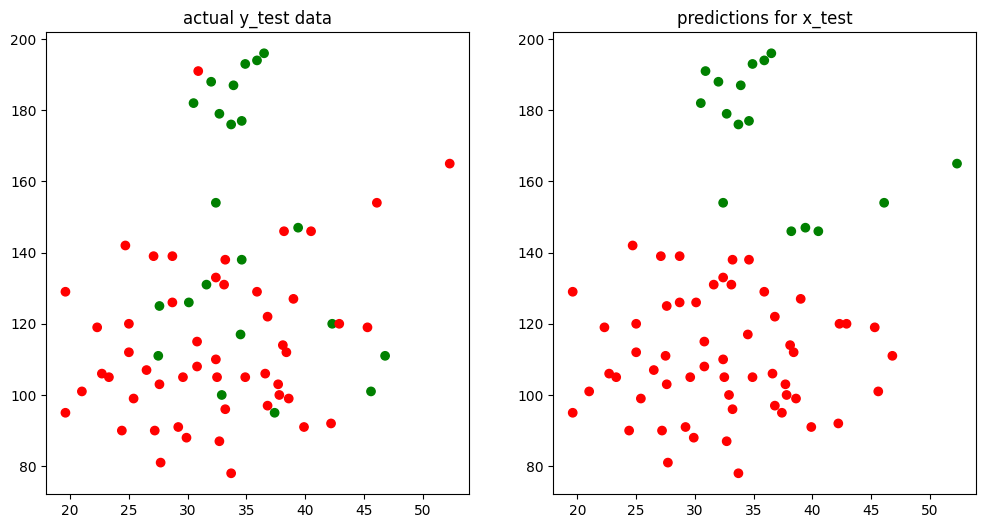

In [38]:
fig,ax=plt.subplots(1,2,figsize=(12, 6))
ax[0].scatter(X_test[:,0],X_test[:,1],c=np.where(y_test=='neg',0,1),cmap=matplotlib.colors.ListedColormap(['red','green']))
ax[0].set_title('actual y_test data')
ax[1].scatter(X_test[:,0],X_test[:,1],c=np.where(predictions=='neg',0,1),cmap=matplotlib.colors.ListedColormap(['red','green']))
ax[1].set_title('predictions for x_test')

**Color mapping based on predictions for x_test** **done above**

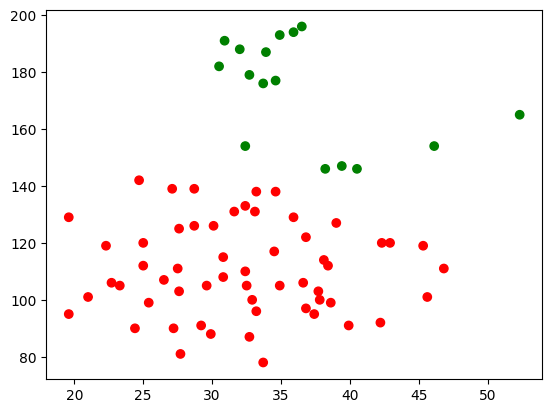

In [39]:
fig,ax=plt.subplots()
ax.scatter(X_test[:,0],X_test[:,1],c=np.where(predictions=='neg',0,1),cmap=matplotlib.colors.ListedColormap(['red','green']))

**Decision Boundary using Glucose and BMI**

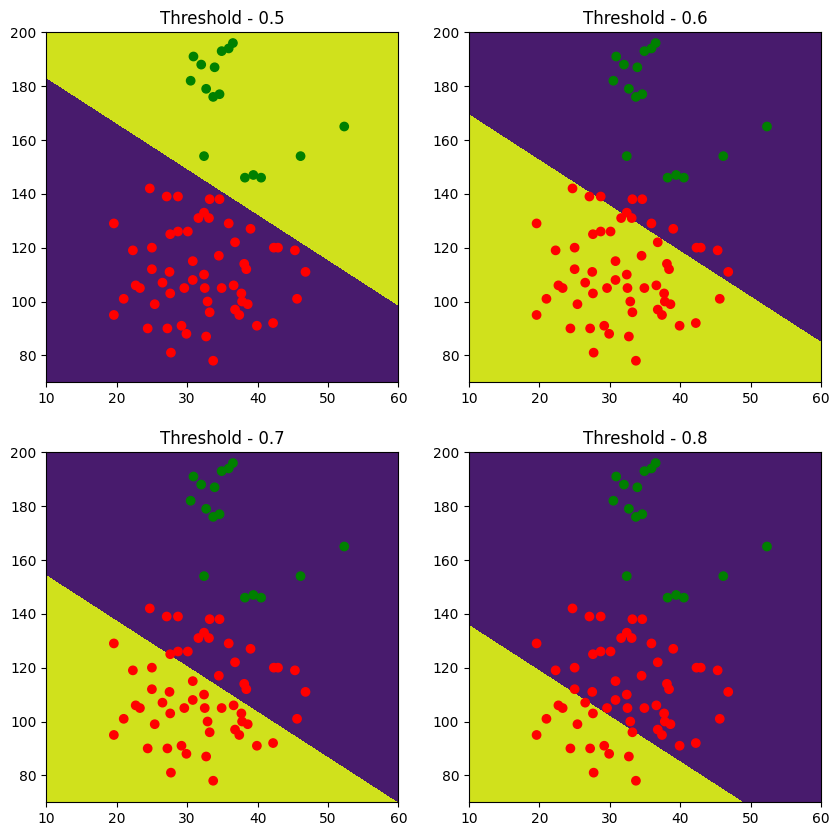

In [57]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
xgrid=np.linspace(10,60,4000)
ygrid=np.linspace(70,200,4000)
X,Y=np.meshgrid(xgrid,ygrid)
Z=logReg.predict(np.c_[X.ravel(),Y.ravel()])
Z=np.where(Z=='pos',1,0)
Z=Z.reshape(X.shape)
ax[0][0].set_title('Threshold - 0.5')
ax[0][0].contourf(X,Y,Z)
ax[0][0].scatter(X_test[:,0],X_test[:,1],c=np.where(predictions=='pos',1,0),cmap=matplotlib.colors.ListedColormap(['red','green']))
ax[0][1].set_title('Threshold - 0.6')
threshold=0.6
Zp=logReg.predict_proba(np.c_[X.ravel(), Y.ravel()])
Z=np.where(Z=='neg', 0, 1)
Z=Z.reshape(X.shape)
y_pred_custom = np.where(Zp[:,0] >= threshold, 1, 0)
Zp=y_pred_custom.reshape(X.shape)
ax[0][1].contourf(X, Y, Zp)
ax[0][1].scatter(X_test[:,0],X_test[:,1],c=np.where(predictions=='pos',1,0),cmap=matplotlib.colors.ListedColormap(['red','green']))
ax[1][0].set_title('Threshold - 0.7')
threshold=0.7
Zp=logReg.predict_proba(np.c_[X.ravel(), Y.ravel()])
Z=np.where(Z=='neg', 0, 1)
Z=Z.reshape(X.shape)
y_pred_custom = np.where(Zp[:,0] >= threshold, 1, 0)
Zp=y_pred_custom.reshape(X.shape)
ax[1][0].contourf(X, Y, Zp)
ax[1][0].scatter(X_test[:,0],X_test[:,1],c=np.where(predictions=='pos',1,0),cmap=matplotlib.colors.ListedColormap(['red','green']))
ax[1][1].set_title('Threshold - 0.8')
threshold=0.8
Zp=logReg.predict_proba(np.c_[X.ravel(), Y.ravel()])
Z=np.where(Z=='neg', 0, 1)
Z=Z.reshape(X.shape)
y_pred_custom = np.where(Zp[:,0] >= threshold, 1, 0)
Zp=y_pred_custom.reshape(X.shape)
ax[1][1].contourf(X, Y, Zp)
ax[1][1].scatter(X_test[:,0],X_test[:,1],c=np.where(predictions=='pos',1,0),cmap=matplotlib.colors.ListedColormap(['red','green']))

**All Attributes**

In [23]:
X=np.array(data.drop('Diabetes',axis=1))
y=data['Diabetes']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [26]:
logReg=linear_model.LogisticRegression(solver='liblinear') #solver='lbfgs' by default
logReg.fit(X_train,y_train)
predictions=logReg.predict(X_test)

In [27]:
metrics.accuracy_score(y_test,predictions)

0.7945205479452054

In [28]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       0.82      0.90      0.86        51
         pos       0.71      0.55      0.62        22

    accuracy                           0.79        73
   macro avg       0.76      0.72      0.74        73
weighted avg       0.79      0.79      0.79        73



In [29]:
print(metrics.classification_report(predictions,y_test))

              precision    recall  f1-score   support

         neg       0.90      0.82      0.86        56
         pos       0.55      0.71      0.62        17

    accuracy                           0.79        73
   macro avg       0.72      0.76      0.74        73
weighted avg       0.82      0.79      0.80        73



# Moving decision boundaries according to acceptance threshold 